# PROJECT : Resume Screening

**Import required libraries**

In [ ]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.express as px

In [ ]:
df=pd.read_csv('/content/archive (1).zip')
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


**Checking missing values**

In [ ]:
df.isna().sum()

Category    0
Resume      0
dtype: int64

In [ ]:
df.dtypes

Category    object
Resume      object
dtype: object

**Find Value count and Data Visualization**

In [ ]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [ ]:
fig=px.histogram(df,x='Category')
fig.show()

In [ ]:
![alt text]('')

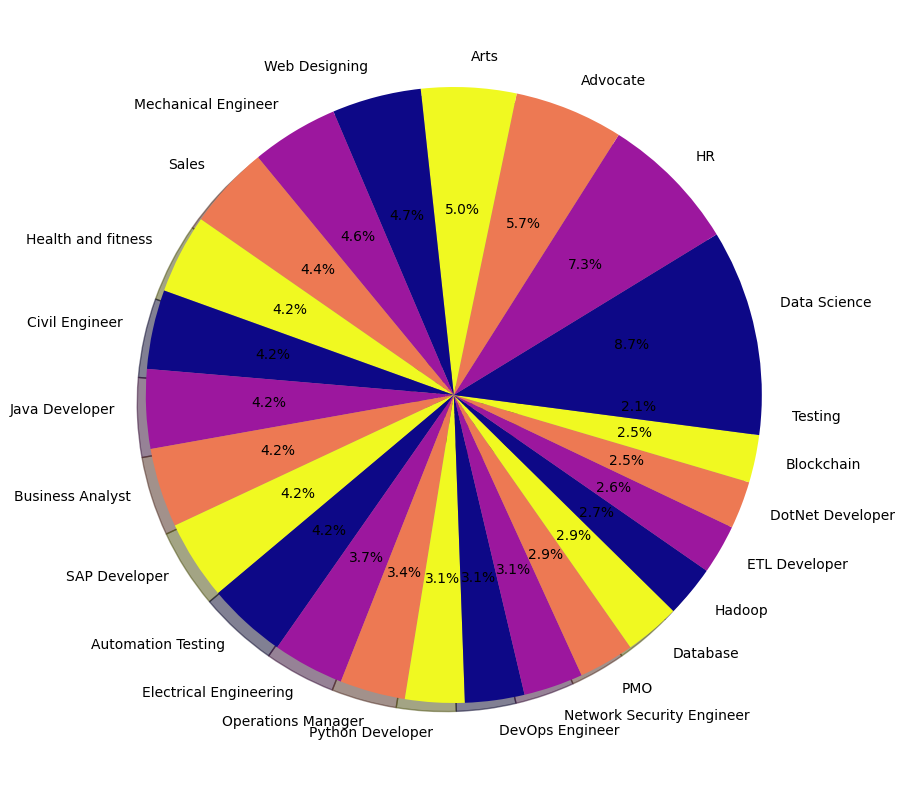

In [ ]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True,colors=plt.cm.plasma(np.linspace(0,1,4)))
plt.show()

In [ ]:
df['Resume'][403]

'Education Details \r\n BE Computer Science Mumbai, Maharashtra Mumbai University\r\n HSC  Mumbai, Maharashtra Maharashtra State Board\r\n SSC  Mumbai, Maharashtra Maharashtra State Board\r\nBusiness Analyst \r\n\r\nBusiness Analyst - Fino Payments Bank\r\nSkill Details \r\nCompany Details \r\ncompany - Fino Payments Bank\r\ndescription - Key Role   In-depth requirement and input gathering\r\nResponsibilities and Achievements:\r\nâ\x99¦ Conducted in-depth requirement and input gathering from all concerned stakeholders [Business SMEs, Technical Architect and Business Architect] to create artifacts like Business Requirement Document (BRD) to arrive at functional requirements for development team\r\nâ\x99¦ Created Functional Specification Document (FSD) highlighting the technical implementation and the use cases\r\nâ\x99¦ Led the Merchant Commission Module project from end-to-end and co-ordinated for CUG and Live\r\nâ\x99¦ Designed the Account Opening Process flow end-to-end during the ti

In [ ]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
text=df['Resume']
text

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [ ]:
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
text=text.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
text

0      Skills * Programming Languages : Python ( pand...
1      Education Details May 2013 to May 2017 B . E U...
2      Areas of Interest Deep Learning , Control Syst...
3      Skills â  ¢ R â  ¢ Python â  ¢ SAP HANA â ...
4      Education Details MCA YMCAUST , Faridabad , Ha...
                             ...                        
957    Computer Skills : â  ¢ Proficient in MS offic...
958    â   Willingness to accept the challenges . â...
959    PERSONAL SKILLS â  ¢ Quick learner , â  ¢ Ea...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP / 7/8 /8 . 1/10 Databa...
Name: Resume, Length: 962, dtype: object

In [ ]:
text=text.str.replace('[^a-zA-Z0-9]+',' ')
text

<ipython-input-15-17d87946c057>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to accept the challenges Positive...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [ ]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
text=text.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
text

0      skill program languag python panda numpi scipi...
1      educ detail may 2013 to may 2017 b e uit rgpv ...
2      area of interest deep learn control system des...
3      skill r python sap hana tableau sap hana sql s...
4      educ detail mca ymcaust faridabad haryana data...
                             ...                        
957    comput skill profici in ms offic word basic ex...
958    willing to accept the challeng posit think goo...
959    person skill quick learner eager to learn new ...
960    comput skill softwar knowledg ms power point m...
961    skill set os window xp 7 8 8 1 10 databas mysq...
Name: Resume, Length: 962, dtype: object

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop=stopwords.words('english')
text=text.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
text

0      skill program languag python panda numpi scipi...
1      educ detail may 2013 may 2017 b e uit rgpv dat...
2      area interest deep learn control system design...
3      skill r python sap hana tableau sap hana sql s...
4      educ detail mca ymcaust faridabad haryana data...
                             ...                        
957    comput skill profici ms offic word basic excel...
958    willing accept challeng posit think good learn...
959    person skill quick learner eager learn new thi...
960    comput skill softwar knowledg ms power point m...
961    skill set os window xp 7 8 8 1 10 databas mysq...
Name: Resume, Length: 962, dtype: object

In [ ]:
'''from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Cate']=le.fit_transform(df['Category'])'''

"from sklearn.preprocessing import LabelEncoder\nle=LabelEncoder()\ndf['Cate']=le.fit_transform(df['Category'])"

In [ ]:
#df1=pd.DataFrame({'Category':df['Category'],'label':df['Cate']})

In [ ]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(text)

In [ ]:
print(train_data)
train_data.shape

  (0, 3330)	0.030391446726845173
  (0, 792)	0.027375518663022652
  (0, 329)	0.02371238311207682
  (0, 2450)	0.045211528476746865
  (0, 465)	0.04656767155485363
  (0, 284)	0.023117009938036497
  (0, 2535)	0.04656767155485363
  (0, 4778)	0.02257378788696762
  (0, 1767)	0.026937851619028386
  (0, 5199)	0.015494918324324076
  (0, 4721)	0.031680275374260616
  (0, 2964)	0.011032136377360939
  (0, 2430)	0.04070297288486184
  (0, 1899)	0.04656767155485363
  (0, 918)	0.03917862484003706
  (0, 574)	0.03791593038255272
  (0, 1334)	0.03839598041202278
  (0, 4814)	0.02299093583803214
  (0, 2039)	0.03791593038255272
  (0, 1787)	0.017559084387582094
  (0, 3251)	0.02003777771487042
  (0, 311)	0.028465983719639088
  (0, 3358)	0.029744239239721866
  (0, 4340)	0.018219992732928132
  (0, 4514)	0.030916713879309055
  :	:
  (961, 448)	0.03269858568478258
  (961, 1713)	0.035866294669224454
  (961, 4945)	0.059150885153093295
  (961, 597)	0.03614804841106143
  (961, 1473)	0.01951446497576632
  (961, 1228)	0.03

(962, 5480)

In [ ]:
x=train_data
x

<962x5480 sparse matrix of type '<class 'numpy.float64'>'
	with 152082 stored elements in Compressed Sparse Row format>

In [ ]:
y=df['Category'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
knn=KNeighborsClassifier(n_neighbors=7)
mnb=MultinomialNB()
s=SVC()
dtc=DecisionTreeClassifier(criterion='entropy')
rfc=RandomForestClassifier()
lst=[knn,mnb,s,dtc,rfc]
acc=[]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
for i in lst:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  acc.append(accuracy_score(y_test,y_pred))
  print('accuracy_score: ',accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print('*'*100)

KNeighborsClassifier(n_neighbors=7)
accuracy_score:  0.9688581314878892
                           precision    recall  f1-score   support

                 Advocate       1.00      0.83      0.91         6
                     Arts       1.00      1.00      1.00         8
       Automation Testing       1.00      1.00      1.00         7
               Blockchain       1.00      1.00      1.00        11
         Business Analyst       1.00      0.67      0.80         9
           Civil Engineer       1.00      1.00      1.00        11
             Data Science       0.90      0.82      0.86        11
                 Database       1.00      1.00      1.00         9
          DevOps Engineer       1.00      0.89      0.94        19
         DotNet Developer       1.00      1.00      1.00        11
            ETL Developer       1.00      1.00      1.00         9
   Electrical Engineering       1.00      1.00      1.00         9
                       HR       1.00      0.94      0.97

In [ ]:
fig=px.bar(x=['KNeighborsClassifier','MultinomialNB','SVC','DecisionTreeClassifier','RandomForestClassifier'],
           y=acc,
           labels={'x':'Models','y':'Accuracy'},
           title='Accuracy of different models',)
fig.show()

In [ ]:
max_acc=max(acc)
print('The best accuracy is',max_acc)
print('The model with the best accuracy is',lst[acc.index(max_acc)])

The best accuracy is 0.9930795847750865
The model with the best accuracy is SVC()


In [ ]:
import pickle
pickle.dump(vec,open('vec.pkl','wb'))
pickle.dump(knn, open('s.pkl', 'wb'))

In [ ]:
my_resume='''Education Details
 BE Computer Science Mumbai, Maharashtra Mumbai University
 HSC  Mumbai, Maharashtra Maharashtra State Board
 SSC  Mumbai, Maharashtra Maharashtra State Board
Business Analyst

Business Analyst - Fino Payments Bank
Skill Details
Company Details
company - Fino Payments Bank
description - Key Role   In-depth requirement and input gathering
Responsibilities and Achievements:
â¦ Conducted in-depth requirement and input gathering from all concerned stakeholders [Business SMEs, Technical Architect and Business Architect] to create artifacts like Business Requirement Document (BRD) to arrive at functional requirements for development team
â¦ Created Functional Specification Document (FSD) highlighting the technical implementation and the use cases
â¦ Led the Merchant Commission Module project from end-to-end and co-ordinated for CUG and Live
â¦ Designed the Account Opening Process flow end-to-end during the time when bank was going Live.
â¦ SPOC for all the configurations (both account level and customer level) in production.
â¦ Led the Cash Controlling Processes for the field users as per the requirement from the business team.
â¦ Design and build proof of concepts to validate the viability of alternate approaches and determine optimum choice
â¦ Involved in Process Design for development of the products
â¦ Performed Functional Testing of the entire system and provided support during UAT by preparing UAT test cases, performing UAT tests to onboard new processes as BAU
â¦ Worked with the development teams in arriving at detailed techno-functional specifications, participate in Feasibility
Analysis
â¦ Conducting twice a week meetings with the vendor to discuss the status of CRs and to resolve technical queries
company - Fino Paytech Pvt. Ltd
description - Key Role   Requirement gathering, Development, Testing
Responsibilities and Achievements:
â¦ Requirement gathering, preparation of traceability matrix, preparation and execution of use cases, developing of test plans based on requirements for Airtel Zambia National Partner Project
â¦ Led the employee profile creation, maintenance of employee details in the database: Preparation of work flow, end-to-end development and testing of the module
â¦ Designed the work flow process of the CAPA (Corrective Action Preventive Analysis) module to maintain the audit findings raised by the internal audit team
â¦ Designed the Expense Management module and automated it for end-to-end in-house expense flow
â¦ Designed the PMO tool Parivartan used for tracking the projects end-to-end'''

In [ ]:
knn=pickle.load(open('s.pkl','rb'))
cleaned_resume=my_resume.replace('[^a-zA-Z0-9]+',' ')
input_features=vec.transform([cleaned_resume])
prediction_id=s.predict(input_features)[0]
print("Predicted Category:",prediction_id)

Predicted Category: Business Analyst
